In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
import sys
sys.path.append('..')

In [3]:
from tf_unet import image_util_fbp
from tf_unet import unet
from tf_unet import util

In [4]:
generator = image_util_fbp.MatDataProvider('../../fbpconv_tf/data/train_elips.mat')

(475, 512, 512, 1)
(475, 512, 512, 1)
Number of channels: 1
Number of classes: 1


In [5]:
x_test, y_test= generator(1)

<Figure size 432x288 with 0 Axes>

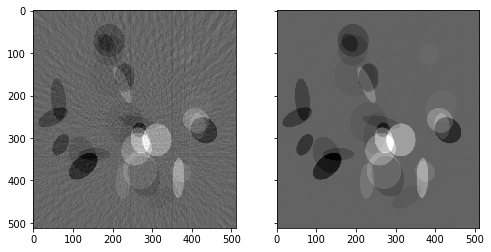

In [6]:
plt.gray()
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0, ..., 0], aspect="auto")
ax[1].imshow(y_test[0, ..., 0], aspect="auto")

In [7]:
print(512/32)
print(2 ** 1 * 32)

16.0
64


In [7]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=5, features_root=32)

W0825 09:52:07.340034 140297947583872 deprecation_wrapper.py:119] From ../tf_unet/unet.py:193: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0825 09:52:07.344285 140297947583872 deprecation_wrapper.py:119] From ../tf_unet/unet.py:198: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 09:52:07.377136 140297947583872 deprecation_wrapper.py:119] From ../tf_unet/layers.py:25: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0825 09:52:07.403362 140297947583872 deprecation.py:506] From ../tf_unet/layers.py:39: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0825 09:52:07.433032 140297947583872 deprecation_wrapper.py:119] From ../tf_unet/layers.py:48: The name tf.nn.

Tensor("output_map/conv2d/dropout/mul_1:0", shape=(?, ?, ?, 1), dtype=float32)
Tensor("preprocessing/Reshape:0", shape=(?, ?, ?, 1), dtype=float32)


W0825 09:52:08.485937 140297947583872 deprecation_wrapper.py:119] From ../tf_unet/unet.py:165: The name tf.summary.histogram is deprecated. Please use tf.compat.v1.summary.histogram instead.

W0825 09:52:09.062247 140297947583872 deprecation_wrapper.py:119] From ../tf_unet/layers.py:68: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [10]:
path = trainer.train(generator, "./unet_trained", training_iters=32, epochs=10, display_step=2)

W0818 06:50:57.621659 140369796900224 deprecation_wrapper.py:119] From ../tf_unet/unet.py:363: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.

W0818 06:50:57.625998 140369796900224 deprecation_wrapper.py:119] From ../tf_unet/unet.py:336: The name tf.train.exponential_decay is deprecated. Please use tf.compat.v1.train.exponential_decay instead.

W0818 06:50:57.631666 140369796900224 deprecation_wrapper.py:119] From ../tf_unet/unet.py:342: The name tf.train.MomentumOptimizer is deprecated. Please use tf.compat.v1.train.MomentumOptimizer instead.

W0818 06:50:58.313694 140369796900224 deprecation_wrapper.py:119] From ../tf_unet/unet.py:370: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0818 06:50:58.317748 140369796900224 deprecation_wrapper.py:119] From ../tf_unet/unet.py:371: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.



InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: Incompatible shapes: [4,1,512,512] vs. [4,1,324,324]
	 [[node output_map/add (defined at ../tf_unet/unet.py:148) ]]
  (1) Invalid argument: Incompatible shapes: [4,1,512,512] vs. [4,1,324,324]
	 [[node output_map/add (defined at ../tf_unet/unet.py:148) ]]
	 [[results/pixel_wise_softmax/truediv/_9]]
0 successful operations.
0 derived errors ignored.

Errors may have originated from an input operation.
Input Source operations connected to node output_map/add:
 preprocessing/Reshape (defined at ../tf_unet/unet.py:65)	
 output_map/conv2d/dropout/mul_1 (defined at ../tf_unet/layers.py:39)

Input Source operations connected to node output_map/add:
 preprocessing/Reshape (defined at ../tf_unet/unet.py:65)	
 output_map/conv2d/dropout/mul_1 (defined at ../tf_unet/layers.py:39)

Original stack trace for u'output_map/add':
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/tornado/ioloop.py", line 1017, in start
    self._run_callback(self._callbacks.popleft())
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 542, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 456, in _handle_events
    self._handle_recv()
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 486, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 438, in _run_callback
    callback(*args, **kwargs)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2714, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2818, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-a6753bed04bb>", line 1, in <module>
    net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=5, features_root=32)
  File "../tf_unet/unet.py", line 201, in __init__
    logits, self.variables, self.offset = create_conv_net(self.x, self.keep_prob, channels, n_class, **kwargs)
  File "../tf_unet/unet.py", line 148, in create_conv_net
    output_map = conv + x_image
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/math_ops.py", line 884, in binary_op_wrapper
    return func(x, y, name=name)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/gen_math_ops.py", line 387, in add
    "Add", x=x, y=y, name=name)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [8]:
x_test, y_test = generator(1)

prediction = net.predict("../unet_trained/model.ckpt", x_test)

W0825 09:52:09.093070 140297947583872 deprecation_wrapper.py:119] From ../tf_unet/unet.py:274: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.

W0825 09:52:09.966805 140297947583872 deprecation_wrapper.py:119] From ../tf_unet/unet.py:307: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

W0825 09:52:10.005543 140297947583872 deprecation.py:323] From /home/urota/anaconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


-141.35475817681137
211.86448820392644
-146.6648
215.63345


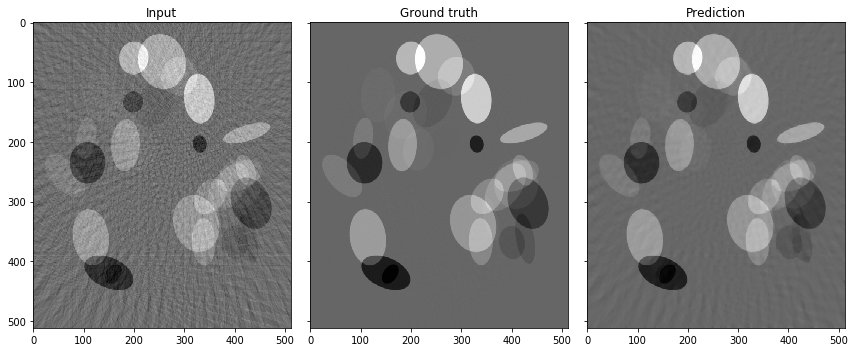

In [9]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,0], aspect="auto")
ax[2].imshow(prediction[0,...,0], aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/fbp_conv.png")
print(np.min(y_test))
print(np.max(y_test))
print(np.min(prediction))
print(np.max(prediction))

In [40]:
def rsnr(rec, oracle):
    "regressed SNR"
    sumP = sum(oracle.reshape(-1))
    sumI = sum(rec.reshape(-1))
    sumIP = sum(oracle.reshape(-1) * rec.reshape(-1))
    sumI2 = sum(rec.reshape(-1)**2)
    A = np.matrix([[sumI2, sumI], [sumI, oracle.size]])
    b = np.matrix([[sumIP], [sumP]])
    c = np.linalg.inv(A)*b  # (A)\b
    rec = c[0, 0]*rec+c[1, 0]
    err = sum((oracle.reshape(-1)-rec.reshape(-1))**2)
    SNR = 10.0*np.log10(sum(oracle.reshape(-1)**2)/err)

    if np.isnan(SNR):
        SNR = 0.0
    return SNR

print(rsnr(y_test, prediction))

import skimage
print(y_test.dtype, y_test.shape)
print(prediction.dtype, prediction.shape)
y_min = np.min(y_test)
p_min = np.min(prediction)
y_max = np.max(y_test)
p_max = np.max(prediction)
print(y_min, p_min, y_max, p_max)
mi = min(y_min, p_min)
ma = max(y_max, p_max)

def normalize(img):
  return img.reshape(512, 512) / 512. + .5

x_n = normalize(x_test)
y_n = normalize(y_test)
p_n = normalize(prediction)
print(skimage.measure.compare_psnr(y_n, p_n))
print(skimage.measure.compare_ssim(y_n, p_n))

print(skimage.measure.compare_psnr(x_n, y_n))
print(skimage.measure.compare_ssim(x_n, y_n))

20.96707525398349
float64 (1, 512, 512, 1)
float32 (1, 512, 512, 1)
-141.35475817681137 -146.6648 211.86448820392644 215.63345
42.73544952237977
0.992308352473543
30.710572510652522
0.8471783422279248


512
512
<generator object _iter_bytes_to_values at 0x7fc6857db1e0>
int32
29744
33970
#
-3024
1202
0.0
255.0


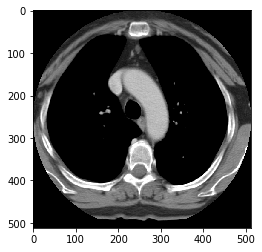

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import png
import numpy as np
from sklearn.preprocessing import minmax_scale
plt.gray()

#reader = png.Reader("/mnt/collect/ct_images/Images_png/000086_04_01/079.png")
reader = png.Reader("/mnt/collect/ct_images/Images_png/000001_01_01/109.png")
pngdata = reader.read()
print(pngdata[0])
print(pngdata[1])
print(pngdata[2])
px_array = np.array(map(np.int32, pngdata[2]))
print(px_array.dtype)
print(np.min(px_array))
print(np.max(px_array))

normalized = px_array - 32768
print("#")
print(np.min(normalized))
print(np.max(normalized))

def intensity_windowing(img, a, b):
    # return img
    assert(a < b)
    return np.minimum(255, np.maximum(0, ((img.astype("float") - a) / (b - a)) * 255))

def show_histogram(img):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.hist(normalized, bins=50)
    fig.show()

normalized = intensity_windowing(normalized, -175, 275)

print(np.min(normalized))
print(np.max(normalized))
plt.imshow(normalized.astype("uint8"))